<a href="https://colab.research.google.com/github/WittmannF/udemy-deep-learning-cnns/blob/main/cnn_implementation_preenchido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Networks - Implementation

Your goal in this project is to classify handwritten digits using Convolutional Neural Networks. Here are a few examples of images from the input data:

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

As output labels, we have a set of integer values ranging from 0 to 9. We are going to follow those steps in this notebook:

1. **Prepare the input data**
2. **Creating a simple fully connected model**
3. **Extending to CNNs**
4. **Visualizing Predictions**

As a summary, three new classes/modules are going to be used:
- [`tf.keras.layers.Flatten`](https://keras.io/layers/core/)
    - Flattens the input. Does not affect the batch size.
- [`tf.keras.layers.Conv2D`](https://keras.io/layers/convolutional/)
    - 2D convolution layer
- [`tf.keras.layers.MaxPooling2D`](https://keras.io/layers/pooling/)
    - Max pooling operation for spatial data.




### 1. Preparing the input data

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train[0]

5

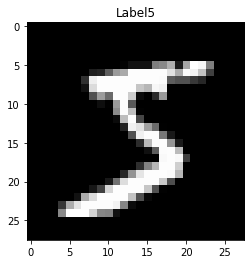

In [ ]:
import matplotlib.pyplot as plt

IDX=0
plt.imshow(X_train[IDX], cmap='gray')
plt.title("Label" + str(y_train[IDX]))
plt.show()

Now, let's normalize the data using standardization:

In [ ]:
x_mean = X_train.mean()
x_mean

33.318421449829934

In [ ]:
x_std = X_train.std()
x_std

78.56748998339798

In [ ]:
X_train_norm = (X_train-x_mean)/x_std

In [ ]:
X_train_norm.mean()

-3.064638490070051e-17

In [ ]:
X_train_norm.std()

0.9999999999999998

In [ ]:
X_test.std()

79.17246322228644

In [ ]:
X_test_norm = (X_test-x_mean)/x_std

In [ ]:
X_test_norm.mean()

0.0060177948928480576

In [ ]:
X_test_norm.std()

1.0077000453879372

In [ ]:
#X_test_norm[0]

Normalisation is required so that all the inputs are at a comparable range.
Say there are two inputs to your ann, x1 and x2. x1 varies from to 0 to 0.5 and x2 varies from 0 to 1000. A change of x1 of 0.5  is 100 percent change where as a change of x2 by 0.5 is only a change of 0.05%. Hence normalization helps. 

### 2. Training using only Fully Connected layers first

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
#del model

In [ ]:
model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(400, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
hist = model.fit(X_train_norm, 
          y_train, 
          validation_data=(X_test_norm, y_test), 
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1902 - accuracy: 0.9411 - val_loss: 0.1121 - val_accuracy: 0.9666
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9734 - val_loss: 0.0893 - val_accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0625 - accuracy: 0.9800 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0477 - accuracy: 0.9842 - val_loss: 0.0936 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0748 - val_accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0711 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.1010 - val_accuracy:

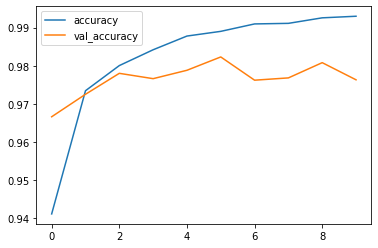

In [ ]:
import pandas as pd
df=pd.DataFrame(hist.history)
df[['accuracy', 'val_accuracy']].plot()

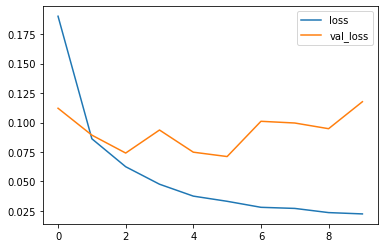

In [ ]:
df[['loss', 'val_loss']].plot()

### 3. Extending to CNNs


Now, let's replicate the same architecture from the visualization provided on the previous video:
![Screen Shot 2019-05-14 at 12 58 15](https://user-images.githubusercontent.com/5733246/57713463-e8627400-7648-11e9-8c64-3745519dbb20.png)

The analog architecture that is going to be used is:
- Conv. Layer with 6 filters
- Maxpooling
- Conv. Layer with 16 filters
- Maxpooling
- Fully connected layer with 120 units
- Fully connected layer with 100 units
- Output layer with 10 units


#### 3.1 CNN - First Intuitions

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
conv = Conv2D(1, kernel_size=(3, 3))

In [ ]:
x=X_train_norm[0].reshape(1, 28, 28, 1)

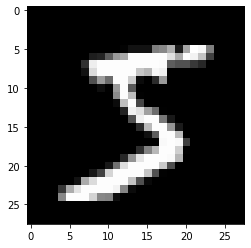

In [ ]:
plt.imshow(X_train_norm[0], cmap='gray')

In [ ]:
conv.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[-0.34802157]],
 
         [[-0.45563442]],
 
         [[ 0.44138622]]],
 
 
        [[[-0.2961277 ]],
 
         [[ 0.33105046]],
 
         [[-0.43721807]]],
 
 
        [[[ 0.27282602]],
 
         [[ 0.14530623]],
 
         [[ 0.25580597]]]], dtype=float32)>,
 <tf.Variable 'conv2d_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [ ]:
new_x = conv(x)

In [ ]:
new_x=new_x.numpy()

In [ ]:
new_x=new_x.reshape(26, 26)

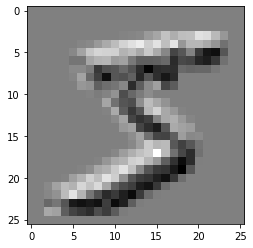

In [ ]:
plt.imshow(new_x, cmap='gray')

#### 3.2 One Conv-Layer

In [ ]:
from tensorflow.keras.layers import Conv2D

model = Sequential([
                    Conv2D(6, 
                           kernel_size=(3,3), 
                           input_shape=(28, 28, 1)),
                    Flatten(),
                    Dense(120, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
flatten_4 (Flatten)          (None, 4056)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               486840    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 500,010
Trainable params: 500,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
X_train_norm=X_train_norm.reshape(60000, 28, 28, 1)
X_test_norm=X_test_norm.reshape(-1, 28, 28, 1)

In [ ]:
hist = model.fit(X_train_norm, 
          y_train, 
          validation_data=(X_test_norm, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.1052 - val_accuracy: 0.9756
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.1084 - val_accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.1349 - val_accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.1366 - val_accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.1408 - val_accuracy: 0.9725


#### 3.3 Two Conv-Layer + Maxpooling

And now, let's finish the architecture:

In [ ]:
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D

model = Sequential([
                    Conv2D(6, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),
                    MaxPool2D(),
                    Conv2D(16, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(120, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_15 (Dense)             (None, 100)              

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
hist = model.fit(X_train_norm, 
          y_train, 
          validation_data=(X_test_norm, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1705 - accuracy: 0.9474 - val_loss: 0.0776 - val_accuracy: 0.9753
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0615 - accuracy: 0.9809 - val_loss: 0.0541 - val_accuracy: 0.9814
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9856 - val_loss: 0.0396 - val_accuracy: 0.9867
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0378 - val_accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0490 - val_accuracy: 0.9852


In [ ]:
model.save('best_model.h5')

### 4. Visualizing predictions

Finally, let's visualize some predictions:

In [ ]:
x=X_test_norm[0].reshape(1, 28, 28, 1)

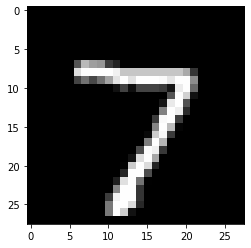

In [ ]:
plt.imshow(x.reshape(28, 28), cmap='gray')

In [ ]:
pred = model.predict(x)

In [ ]:
pred

array([[4.5803691e-12, 8.4376303e-08, 1.7364101e-09, 5.7993663e-09,
        1.5799786e-10, 7.5107828e-12, 3.2882929e-15, 9.9999988e-01,
        7.2302345e-11, 7.1998796e-10]], dtype=float32)

In [ ]:
idx = pred.argmax()
idx

7

In [ ]:
pred[0][idx]

0.9999999

In [ ]:
y_test[0]

7

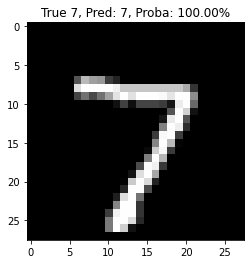

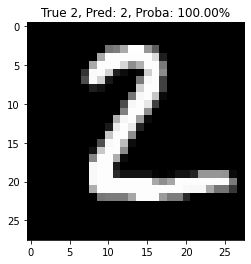

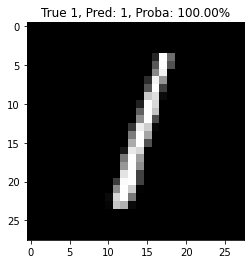

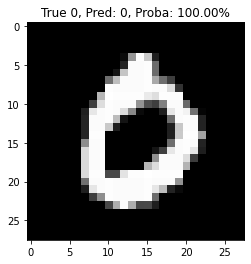

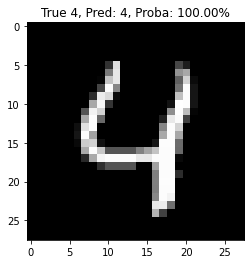

In [ ]:
for idx in range(5):
    x=X_test_norm[idx].reshape(1, 28, 28, 1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    pred = model.predict(x)
    pred_class = pred.argmax()
    plt.title(f'True {y_test[idx]}, Pred: {pred_class}, Proba: {pred[0][pred_class]*100:.2f}%')
    plt.show()


### 5. (Bonus) Visualizing Conv Filters

In [ ]:
conv_layer = model.layers[0]

In [ ]:
#conv_layer.weights

In [ ]:
x=X_train_norm[0].reshape(1, 28, 28, 1)

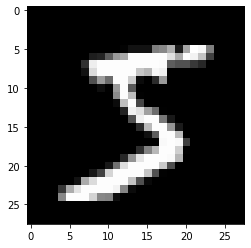

In [ ]:
plt.imshow(x.reshape(28,28), cmap='gray')

In [ ]:
conv_layer?

In [ ]:
output_imgs = conv_layer(x)

In [ ]:
output_imgs.shape

TensorShape([1, 26, 26, 6])

In [ ]:
#output_img

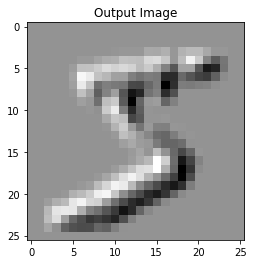

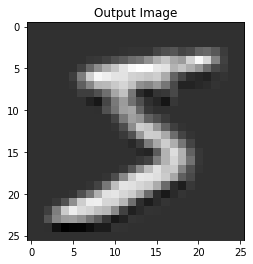

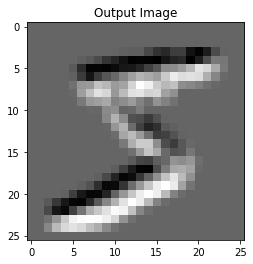

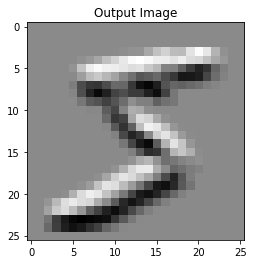

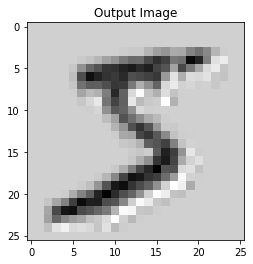

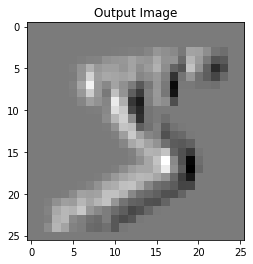

In [ ]:
for idx in range(6):
    img=output_img[:, :, :, idx].numpy().reshape(26,26)
    plt.imshow(img, cmap='gray')
    plt.title('Output Image')
    plt.show()